<a href="https://colab.research.google.com/github/KaueAbbe/Projeto-Estude_Python/blob/main/Estude%20Machine%20Learning/Clustering/CLUSTERS_Interpretacao_e_Banco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = 6 color ='blue'> Aprendendo Clusters: Interpretação e uso em sistemas Bancário</font>

Este notebook se baseou em dois cursos da alura cursos online:
1.  Clustering: extraindo padrões de dados
2. Ainda irei Fazer e Anotar

As bibliotecas que serão usadas:
1. Pandas e Numpy
2. Scikit-learn

**OBJETIVO:**
Conseguir saber onde, quando e como utilizar a clusterização. Além de conseguir intepretar os resultados.

# Importar e averiguar os dados

In [1]:
import pandas as pd

In [2]:
url ='https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv'
dados = pd.read_csv(url)

CUSTID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases (

BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFFPURCHASES : Maximum purchase amount done in one-go

INSTALLMENTSPURCHASES : Amount of purchase done in installment

CASHADVANCE : Cash in advance given by the user

PURCHASESFREQUENCY : How frequently the Purchases are being made, score 
between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASESTRX : Numbe of purchase transactions made

CREDITLIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

In [3]:
dados.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Tratamento dos dados

In [5]:
dados[dados['MINIMUM_PAYMENTS'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


Vamos retirar colunas que não fazem sentido para criar os clusters e tratar dados nulos

In [6]:
df1 = dados.drop(columns = ['CUST_ID','TENURE'])
df1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000


In [7]:
df1.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

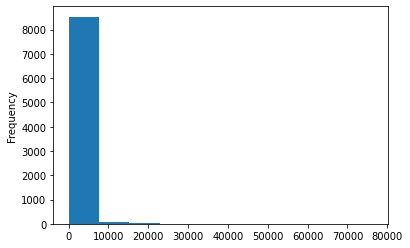

In [8]:
df1['MINIMUM_PAYMENTS'].plot.hist()

Para tratar o minimum_payments vou utilizar a estratégias de substituir o valor pela mediana. Uma vez não há tanta disparidade do histograma fazer essa mudança não afetará o resultado. 

Houve tentativa de averiguar o motivo pela qual não há os dados, nada foi encontrado.

In [9]:
df1.fillna(df1.median(),inplace = True)

In [10]:
df1.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

Normalizando os dados e criando o cluster

In [11]:
from sklearn.preprocessing import Normalizer

In [12]:
values = Normalizer().fit_transform(df1.values)
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters = 5, n_init = 10, max_iter = 300)
y_pred = kmeans.fit_predict(values)

In [15]:
y_pred

array([0, 3, 0, ..., 0, 0, 2], dtype=int32)

Obtivemos os clusters e agora devemos **validar**. Essa é uma etapa super importante!

**Coeficiente de Silhouette**: É um coeficiente usado na validação dos cluster usando a distância entre amostras do mesmo grupo e amostras entre grupos para o cálculo. Em geral, queremos um valor positivo, o qual indica que os grupos estão mais distantes um do outro e agrupados entre seus membros

In [16]:
from sklearn import metrics

In [17]:
labels = kmeans.labels_
labels

array([0, 3, 0, ..., 0, 0, 2], dtype=int32)

 * Silhouette

In [18]:
silhouette = metrics.silhouette_score(values, labels, metric = 'euclidean')
if silhouette > 0:
  print(f'Cluster validado: {silhouette}')
else:
  print(f'Cluster Não validado: {silhouette}')

Cluster validado: 0.36450360640080837


* Davies Bouldin: O resultado esperando é o mais próximo de 0

In [19]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.075784077836666


* Calinsk - Harabasz: Resultado esperado é o mais longe de 0

In [20]:
calinsk = metrics.calinski_harabasz_score(values, labels)
print(calinsk)

3431.794260865586


# Validando os Clusters
## Validação relativa
Vamos alterar as criações de clusters mudando os parâmetros.

In [21]:
def clustering_algorithm(n_clusters, dataset):
  kmeans = KMeans(n_clusters = n_clusters, n_init = 10, max_iter = 300)
  labels = kmeans.fit_predict(dataset)

  s = metrics.silhouette_score(dataset, labels)
  dbs = metrics.davies_bouldin_score(dataset, labels)
  calinsk = metrics.calinski_harabasz_score(dataset,labels)

  return s,dbs,calinsk

In [22]:
for item in range(2,8):
  s,d,c = clustering_algorithm(item,values)
  print(f"Para cluster: {item} \n Silhouet: {s} \n Davies: {d} \n Calinsnk: {c}")

Para cluster: 2 
 Silhouet: 0.29913992027435277 
 Davies: 1.5180867343147846 
 Calinsnk: 3321.84635812273
Para cluster: 3 
 Silhouet: 0.3272203126696238 
 Davies: 1.3096073640088426 
 Calinsnk: 3526.440519908274
Para cluster: 4 
 Silhouet: 0.3482575953242431 
 Davies: 1.2212366810998647 
 Calinsnk: 3528.6954358649723
Para cluster: 5 
 Silhouet: 0.3643478207845073 
 Davies: 1.0767101782705588 
 Calinsnk: 3431.6244662924228
Para cluster: 6 
 Silhouet: 0.3648544574844091 
 Davies: 1.045346318038766 
 Calinsnk: 3523.516921381918
Para cluster: 7 
 Silhouet: 0.3275604659082647 
 Davies: 1.151733954094697 
 Calinsnk: 3398.383131204061


Dados os resultados acima escolhi usar 5 clusters. Apresenta a melhor metrica de Silhouter, enquanto as demais não apresenta muitas diferenças.

## Validação por comparação
Nesta comparamos com dados uniformemente aleatórios. Comparamos os valores das métricas dos dados randômicos com os valores de métricas obtidos

In [23]:
import numpy as np
random_data = np.random.rand(8950, 16)

In [24]:
clustering_algorithm(5, random_data)

(0.039358392316010876, 3.544974606513501, 302.3128221342675)

## Validando estabilidade do cluster
Nesta etapa dividimos (split) nossos dados e analisamos o reusltado os clusters para cada divisão. Os resultados devem ser próximo para cada métricas.

In [25]:
for item in np.array_split(values, 3):
  s1, d1, c1 = clustering_algorithm(5, item)
  print(f"Silhouet: {s1} \n Davies: {d1} \n Calinsnk: {c1}")

Silhouet: 0.36908155221853267 
 Davies: 1.0580445685596032 
 Calinsnk: 1204.0558494933455
Silhouet: 0.3538037064965953 
 Davies: 1.1394936582652302 
 Calinsnk: 1194.948634553892
Silhouet: 0.3670087810198851 
 Davies: 1.0985826650112787 
 Calinsnk: 1167.513614226523


# Validação Visual

In [26]:
import matplotlib.pyplot as plt

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [41]:
set(labels)

{0, 1, 2, 3, 4}

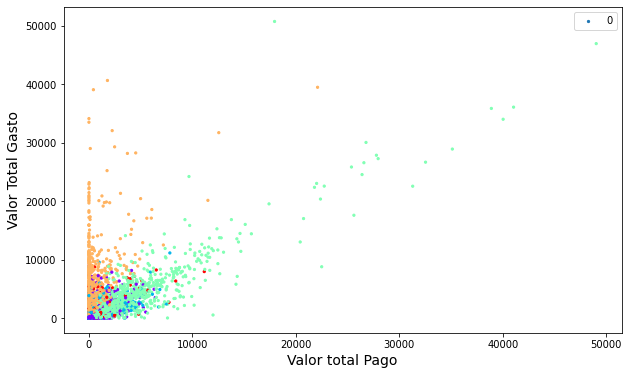

In [42]:
plt.figure(figsize=(10,6))
plt.scatter(df1['PURCHASES'], df1['PAYMENTS'], c =labels, s= 5, cmap ='rainbow')
plt.xlabel('Valor total Pago', fontsize = 14)
plt.ylabel('Valor Total Gasto', fontsize = 14)
plt.show()

Não consigo ver todos os clusters usados. COnsigo identificar o verde e o laranja. Como saber qual cluster são essas cores?

In [43]:
import seaborn as sns

In [44]:
df1['cluster'] = labels

#Validando por Estatística

In [48]:
df1.groupby('cluster').describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        3280.0   443.746756   846.398201   0.000000    23.365333   
1        2648.0  3038.132314  2479.290949   6.824905  1256.126442   
2        1538.0  1143.712630  1664.669654   0.000000   212.513230   
3        1072.0  1794.637544  1983.094646   0.000000   506.925348   
4         412.0  1987.146873  1852.215743  70.794108  1020.146724   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0          82.941478   410.126095   9630.367575            3280.0  0.774389   
1        2173.994774  4224.605542  18495.558550            2648.0  0.963768   
2         555.745265  1371.943854  19043.138560            1538.0  0.928255   
3        1087.920500  2316.353276  14581.459140            1072.0  0.862113   
4        1338.918346  2133.415063  11670.179850             412.0  0.989512   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       248.733727   4483.503862           3280.0  0.246806   
1        ...      1330.437428   8345.641905           2648.0  0.001800   
2        ...       524.765832  18621.013310           1538.0  0.278149   
3        ...       886.834603  21235.065300           1072.0  0.117280   
4        ...      7086.774783  76406.207520            412.0  0.019271   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.346748  0.0  0.0  0.000000  0.444444  1.0  
1        0.023264  0.0  0.0  0.000000  0.000000  0.6  
2        0.366934  0.0  0.0  0.083333  0.545455  1.0  
3        0.186888  0.0  0.0  0.083333  0.142857  1.0  
4        0.090795  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

In [50]:
centroids = kmeans.cluster_centers_
centroids

array([[6.90073361e-02, 2.30766891e-04, 1.21550029e-01, 4.79648309e-02,
        7.36854877e-02, 2.41461968e-02, 1.72963518e-04, 3.36841615e-05,
        1.40413929e-04, 7.90653807e-06, 1.23534853e-04, 2.86549943e-03,
        9.43618663e-01, 1.53799518e-01, 5.68479389e-02, 7.61957975e-05],
       [5.04051566e-01, 2.72123953e-04, 6.16763508e-02, 3.62560254e-02,
        2.54420385e-02, 2.52917433e-01, 6.71318568e-05, 2.56858533e-05,
        4.48805835e-05, 5.74313497e-05, 1.15687738e-03, 1.32816939e-03,
        7.19419015e-01, 1.66067078e-01, 1.79058263e-01, 5.52303554e-07],
       [1.59893172e-01, 2.45101382e-04, 4.38385714e-01, 2.57205740e-01,
        1.81351596e-01, 2.60404572e-02, 2.04213900e-04, 8.90367629e-05,
        1.50434389e-04, 9.40165310e-06, 1.70436759e-04, 6.17221746e-03,
        6.03815441e-01, 4.02876087e-01, 8.52134751e-02, 7.19112993e-05],
       [2.35417892e-01, 2.16635031e-04, 6.01593847e-02, 3.41108036e-02,
        2.60537957e-02, 4.00438484e-01, 5.27178877e-05, 2.046

In [59]:
for i in range(len(centroids[0])):
  print(df1.columns[i], "{:.4f}".format(centroids[:,i].var()))

BALANCE 0.0224
BALANCE_FREQUENCY 0.0000
PURCHASES 0.0197
ONEOFF_PURCHASES 0.0077
INSTALLMENTS_PURCHASES 0.0036
CASH_ADVANCE 0.0226
PURCHASES_FREQUENCY 0.0000
ONEOFF_PURCHASES_FREQUENCY 0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 0.0000
CASH_ADVANCE_FREQUENCY 0.0000
CASH_ADVANCE_TRX 0.0000
PURCHASES_TRX 0.0000
CREDIT_LIMIT 0.0360
PAYMENTS 0.0279
MINIMUM_PAYMENTS 0.0540
PRC_FULL_PAYMENT 0.0000


In [71]:
for i in range(len(centroids[0])):
  if round(centroids[:,i].var(),4) > 0:
    print(df1.columns[i], "{:.4f}".format(centroids[:,i].var()))

BALANCE 0.0224
PURCHASES 0.0197
ONEOFF_PURCHASES 0.0077
INSTALLMENTS_PURCHASES 0.0036
CASH_ADVANCE 0.0226
CREDIT_LIMIT 0.0360
PAYMENTS 0.0279
MINIMUM_PAYMENTS 0.0540


BALANCE 0.0224 \\
PURCHASES 0.0197 \\
CASH_ADVANCE 0.0226 \\
CREDIT_LIMIT 0.0360 \\
PAYMENTS 0.0279 \\

Vou selecionar apenas esses valores

In [77]:
df1.groupby('cluster')['BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS'].mean().round(2)

<ipython-input-77-6382d3df749c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1.groupby('cluster')['BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS'].mean().round(2)


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS
cluster,,,,,
0,443.75,629.25,141.48,5130.55,814.29
1,3038.13,385.10,1636.11,4496.34,968.60
2,1143.71,3274.69,186.05,4103.88,3046.00
3,1794.64,470.99,3269.76,3974.04,4701.02
4,1987.15,858.33,420.11,2226.70,1338.97


In [79]:
descricao = df1.groupby('cluster')['BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS']
n_clientes = descricao.size()
descricao = descricao.mean()
descricao['n_clientes'] = n_clientes
descricao.round(2)

<ipython-input-79-fbbef55e7094>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  descricao = df1.groupby('cluster')['BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS']


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clientes
cluster,,,,,,
0,443.75,629.25,141.48,5130.55,814.29,3280
1,3038.13,385.10,1636.11,4496.34,968.60,2648
2,1143.71,3274.69,186.05,4103.88,3046.00,1538
3,1794.64,470.99,3269.76,3974.04,4701.02,1072
4,1987.15,858.33,420.11,2226.70,1338.97,412


Geralmente usamos valores extremos para fazer análise \\
**BALANCE**
* Cluster 0: Clientes com os menores valores em gastos(BALANCE)
* Cluster 1: Clientes com os maiores valores em gastos

**PURCHASES**
* Cluster 1: Menor valores
* Cluster 2: Maior valor (GRANDE DIFERENÇA)

**CASH_ADVANCE**
* Cluster 0: Menor valor
* Cluster 1: Valor consideravelmente alto
* Cluster 2: Maior valores

**CREDIT_LIMIT**
* CLuster 3: Menor valores
* Cluster 0: Maior valor
* Cluster 1 2,3: próximos

**PAYMENTS**
* Cluster 0: Menor valor
* Cluster 3: Maior valor
* Cluster 2: segundo maior

**Número de Clientes em ordem**:0,1,2,3,

AVALIANDO
CLUSTER 0: CLientes que menos gastam, mas com maior limite de crédito. \\
CLUSTER 1: Clientes que mais gastam, com foco em saques. \\
CLUSTER 2: Clientes que tem algo pagamento e adiantamento em dinheiro \\
CLUSTER 3: Menor limite de crédito, com maior valor de saques \\
CLUSTER 4: Cliente na média


In [81]:
df1.groupby('cluster')['PRC_FULL_PAYMENT'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,3280.0,0.246806,0.346748,0.0,0.0,0.000000,0.444444,1.0
1,2648.0,0.001800,0.023264,0.0,0.0,0.000000,0.000000,0.6
2,1538.0,0.278149,0.366934,0.0,0.0,0.083333,0.545455,1.0
3,1072.0,0.117280,0.186888,0.0,0.0,0.083333,0.142857,1.0
4,412.0,0.019271,0.090795,0.0,0.0,0.000000,0.000000,1.0


AVALIANDO
CLUSTER 0: CLientes que menos gastam, mas com maior limite de crédito.Bons pagadores. \\
CLUSTER 1: Clientes que mais gastam, com foco em saques.Piores pagadores \\
CLUSTER 2: Clientes que tem algo pagamento e adiantamento em dinheiro. Melhores pagadores \\
CLUSTER 3: Menor limite de crédito, com maior valor de saques \\
CLUSTER 4: Cliente na média. Segundo pior pagador.

# Utilizando os clusters

Podemos fazer com que o grupo 0 comecem a gastar mais, já que tem um maior número de pessoas, são bons pagadores e tem limite alto.

O mesmo pode ser feito com o grupo 2. 

Para verificar se a nossa hipótese(criada com fins de alterar o comportamento do grupo 0) temos que fazer um teste AB. 
